In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns


In [5]:
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [6]:
df=pd.read_csv('test_restaurant.csv',parse_dates=['date'])
df

,date,num_visitors
0,2000-01-01,49.128490
1,2000-01-02,50.288060
2,2000-01-03,53.549213
3,2000-01-04,45.453240
4,2000-01-05,49.469402
...,...,...
3646,2009-12-25,31.124632
3647,2009-12-26,27.293856
3648,2009-12-27,30.218498
3649,2009-12-28,24.751186


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3651 non-null   datetime64[ns]
 1   num_visitors  3651 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [8]:
df['date'].nunique()

3651

In [9]:
df['visits']=df['num_visitors'].apply(np.ceil)
df.drop('num_visitors',axis=1,inplace=True)

In [10]:
df['day_of_week']=df['date'].dt.dayofweek
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df.head()

,date,visits,day_of_week,month,year
0,2000-01-01,50.0,5,1,2000
1,2000-01-02,51.0,6,1,2000
2,2000-01-03,54.0,0,1,2000
3,2000-01-04,46.0,1,1,2000
4,2000-01-05,50.0,2,1,2000


In [12]:
temp=df.groupby('day_of_week')
temp['visits'].sum()

day_of_week
0    13269.0
1    13252.0
2    13246.0
3    13143.0
4    13097.0
5    13113.0
6    13162.0
Name: visits, dtype: float64

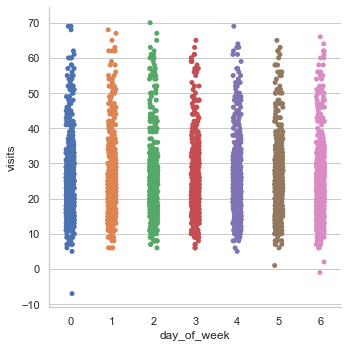

In [14]:
sns.catplot(x='day_of_week',y='visits',data=df)

In [15]:
df['day_of_week'].value_counts()

5    522
1    522
6    522
0    522
3    521
4    521
2    521
Name: day_of_week, dtype: int64

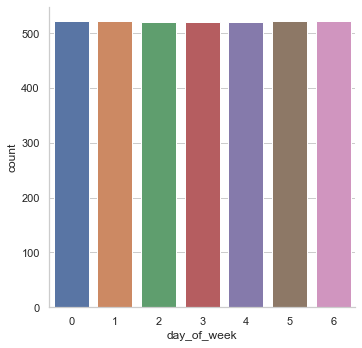

In [17]:
sns.factorplot(x='day_of_week',data=df,kind='count')

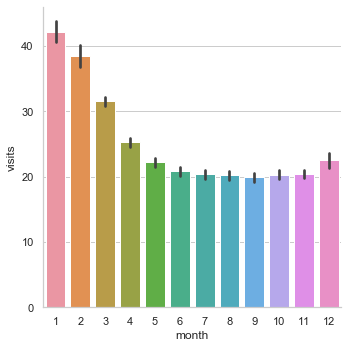

In [28]:
sns.catplot(x='month',y='visits',data=df,kind='bar')

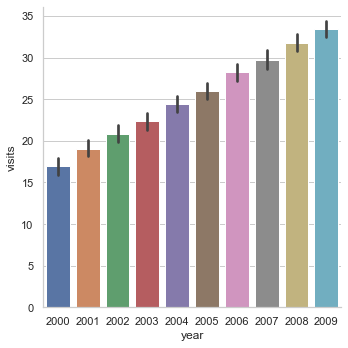

In [26]:
sns.factorplot(x='year',y='visits',data=df,kind='bar')

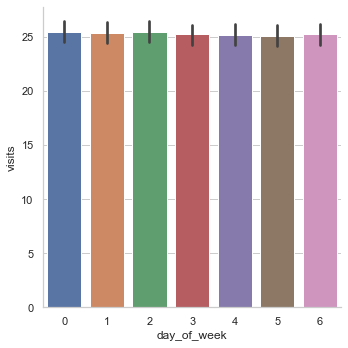

In [24]:
sns.factorplot(x='day_of_week',y='visits',data=df,kind='bar')

HENCE IT CAN BE SEEN THAT THE NUMBER OF VISITS PER YEAR IS INCREASING MIGHT BE DUE TO BETTER FACILITIES AT RESTAURANT
VISITS IN THE MONTH OF JANUARY IS HIGHEST

In [29]:
df.describe()

,visits,day_of_week,month,year
count,3651.000000,3651.000000,3651.000000,3651.000000
mean,25.275815,3.000000,6.519310,2004.497124
std,11.191891,2.000959,3.447905,2.871910
min,-7.000000,0.000000,1.000000,2000.000000
25%,18.000000,1.000000,4.000000,2002.000000
50%,23.000000,3.000000,7.000000,2004.000000
75%,30.000000,5.000000,10.000000,2007.000000
max,70.000000,6.000000,12.000000,2009.000000


In [32]:
df[df['visits']>0].count()

date           3649
visits         3649
day_of_week    3649
month          3649
year           3649
dtype: int64

In [33]:
df2=df[df['visits']>0]

In [34]:
df2.describe()

,visits,day_of_week,month,year
count,3649.000000,3649.000000,3649.000000,3649.000000
mean,25.291861,3.000000,6.521787,2004.499315
std,11.173720,2.000274,3.447226,2.871148
min,1.000000,0.000000,1.000000,2000.000000
25%,18.000000,1.000000,4.000000,2002.000000
50%,23.000000,3.000000,7.000000,2004.000000
75%,30.000000,5.000000,10.000000,2007.000000
max,70.000000,6.000000,12.000000,2009.000000


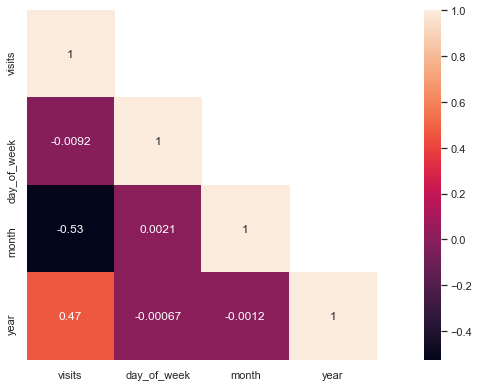

In [39]:
corr_mat=df[:].corr()
mask=np.array(corr_mat)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(15,6)
sns.heatmap(data=corr_mat,mask=mask,square=True,annot=True,cbar=True)

In [42]:
df2.isnull().sum()

date           0
visits         0
day_of_week    0
month          0
year           0
dtype: int64

NUMBER OF VISITS IS HIGHLY CORRELATED WITH YEAR AND MONTH

In [46]:
df2.head()

,date,visits,day_of_week,month,year
0,2000-01-01,50.0,5,1,2000
1,2000-01-02,51.0,6,1,2000
2,2000-01-03,54.0,0,1,2000
3,2000-01-04,46.0,1,1,2000
4,2000-01-05,50.0,2,1,2000


In [52]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [53]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [54]:
x_train,x_test,y_train,y_test=train_test_split(df2.drop(['visits','date'],axis=1),df2['visits'],test_size=0.25,random_state=42)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2736, 3)
(913, 3)
(2736,)
(913,)


In [56]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor(),SVR(),LinearRegression()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor','SVR','LinearRegression']
rmsle=[]
d={}
for model in range (len(models)):
    c=models[model]
    c.fit(x_train,y_train)
    test_predict=c.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_predict,y_test)))
d={'modelling_algo':model_names,'RMSLE':rmsle}
d

{'modelling_algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor',
  'SVR',
  'LinearRegression'],
 'RMSLE': [0.29026855146583724,
  0.3021537423764913,
  0.29166174427351704,
  0.27973778490851364,
  0.2552103263570838,
  0.2990127578881387]}

In [57]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,modelling_algo,RMSLE
0,RandomForestRegressor,0.290269
1,AdaBoostRegressor,0.302154
2,BaggingRegressor,0.291662
3,KNeighborsRegressor,0.279738
4,SVR,0.255210
5,LinearRegression,0.299013


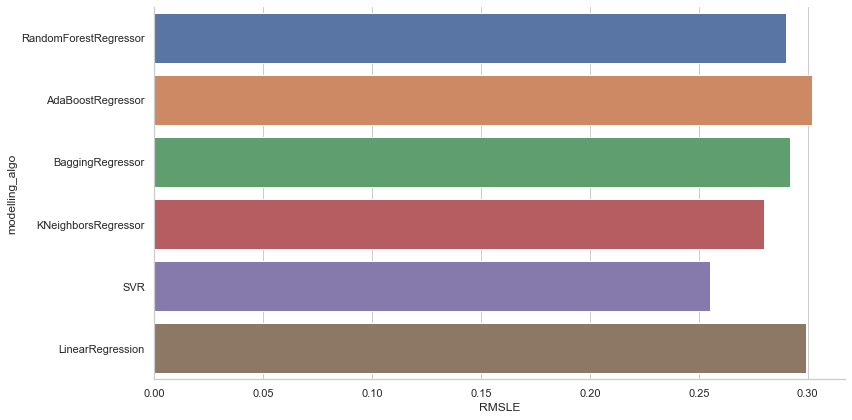

In [58]:
sns.factorplot(y='modelling_algo',x='RMSLE',data=rmsle_frame,kind='bar',size=6,aspect=2)

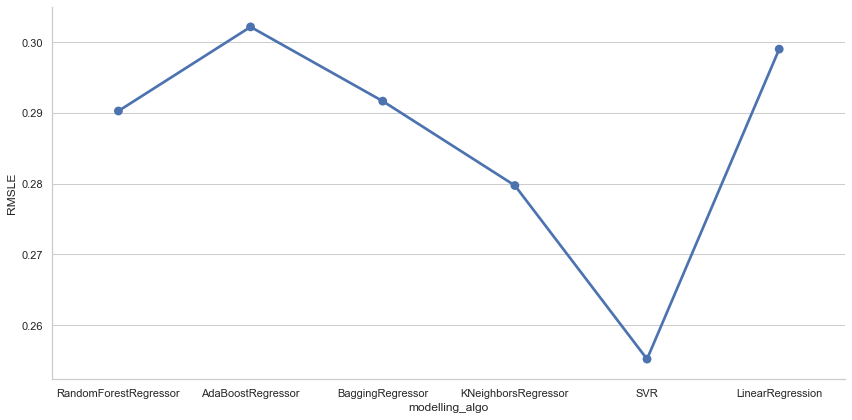

In [61]:
sns.factorplot(x='modelling_algo',y='RMSLE',data=rmsle_frame,kind='point',size=6,aspect=2)

HENCE SUPPORT VECTOR REGRESSOR IS THE MOST ACCURATE MODEL

SINCE IT HAS THE LEAST RMSE VALUE

In [62]:
df2

,date,visits,day_of_week,month,year
0,2000-01-01,50.0,5,1,2000
1,2000-01-02,51.0,6,1,2000
2,2000-01-03,54.0,0,1,2000
3,2000-01-04,46.0,1,1,2000
4,2000-01-05,50.0,2,1,2000
...,...,...,...,...,...
3646,2009-12-25,32.0,4,12,2009
3647,2009-12-26,28.0,5,12,2009
3648,2009-12-27,31.0,6,12,2009
3649,2009-12-28,25.0,0,12,2009


In [64]:
test_df=pd.DataFrame({'day_of_week':[2],'month':[12],'year':[2009]})
test_df

,day_of_week,month,year
0,2,12,2009


In [68]:
m=SVR()
m.fit(x_train,y_train)
pred=m.predict(test_df)
d={'count':pred}
ans=pd.DataFrame(d)
ans.apply(np.ceil)

,count
0,31.0


HENCE THE PREDICTED NUMBER OF VISITS IS 31

THE END